In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [29]:
data=pd.read_excel("jharkhand.xlsx")

In [30]:
data['Timestamp']=pd.to_datetime(data.Timestamp)

In [31]:
df=data.iloc[:]

In [32]:
cols=list(df)[1:2]

In [33]:
df1= df.iloc[:38400]
df2=df.iloc[38400:]

In [34]:
dataset=df[cols].astype(float)
train_1 = df1[cols].astype(float)

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(train_1)
train = scaler.transform(train_1)

In [36]:
# Using 400 days as train and 58 days for testing

In [37]:
n_future=1
n_past=96

In [38]:
def splitter(dataset, n_past,n_future):
    X=[]
    Y=[]
    for i in range(n_past,len(dataset) - n_future+1):
        X.append(dataset[i-n_past:i,0:dataset.shape[1]])
        Y.append(dataset[i+n_future-1:i+n_future,0])
    return np.array(X),np.array(Y)


In [66]:
trainX,trainY=splitter(train,n_past,n_future)

In [41]:
tra

numpy.ndarray

In [42]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 96, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(trainX, trainY, epochs=2, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/2
2155/2155 [==============================] - 179s 81ms/step - loss: 0.0054 - val_loss: 0.0096
Epoch 2/2
2155/2155 [==============================] - 176s 81ms/step - loss: 0.0037 - val_loss: 0.0143


In [67]:
templist = trainX[-96:]

In [21]:
df2['predict'] = y_pred_future

C:\Users\91939\AppData\Local\Temp\ipykernel_24572\2100764786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predict'] = y_pred_future


C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Timestamp', ylabel='demand'>

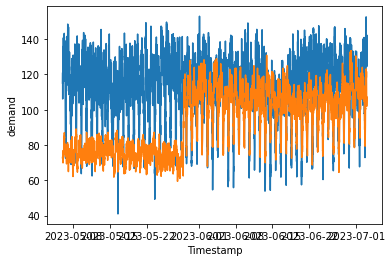

In [23]:
sns.lineplot(df2['Timestamp'],df2['demand'])
sns.lineplot(df2['Timestamp'],df2['predict'])

In [24]:
def mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

In [27]:
mspe = mean_squared_percentage_error(df2['demand'],y_pred_future)
print(f'Mean Squared Percentage Error: {mspe:.2f}%')

Mean Squared Percentage Error: 5.94%
